In [15]:
import numpy as np
from numpy import random
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [35]:
# Creating and Manipulating a Pandas DataFrame

surveyData = pd.DataFrame({'id': list(range(1, 7)),
                           'age': [30, 21, 50, 48, 25, np.nan],
                           'gender': ['M', 'F', 'M', 'M', 'M', 'F'],
                           'merital': ['single', 'married', 'married', 'single', 'divorced', 'single'],
                           'bodys': ['fat', 'thin', 'medium', 'medium', 'medium', 'medium'],
                           'height': [170, 164, 168, 180, 195, 177]})

# Printing 3rd row of surveyData and naming the output Series
num3 = surveyData.ix[2]
num3.name = 'Survey 3'
num3

age             50
bodys       medium
gender           M
height         168
id               3
merital    married
Name: Survey 3, dtype: object

In [40]:
# Printing Female surveys only
surveyData[surveyData['gender'] == 'F']

,age,bodys,gender,height,id,merital
1,21.0,thin,F,164,2,married
5,NaN,medium,F,177,6,single


In [38]:
# Excersizing conditional DataFrame slicing
surveyData[(surveyData.index != 1) & (surveyData.index != 4)]

,age,bodys,gender,height,id,merital
0,30.0,fat,M,170,1,single
2,50.0,medium,M,168,3,married
3,48.0,medium,M,180,4,single
5,NaN,medium,F,177,6,single


In [37]:
# Display gender and mertial status 
surveyData[['gender', 'merital']]

,gender,merital
0,M,single
1,F,married
2,M,married
3,M,single
4,M,divorced
5,F,single


In [36]:
# More condtional DF slicing (get surveys with height greater than 175 cm)
surveyData[(surveyData['gender'] == 'M') & (surveyData['height'] > 175)]

,age,bodys,gender,height,id,merital
3,48.0,medium,M,180,4,single
4,25.0,medium,M,195,5,divorced


In [53]:
# Printing out surveys average age.
# Setting null values to ages mean values in order to reduce mean value skew.
surveyData['age'].replace(np.nan, surveyData['age'].mean(skipna=True), inplace=True)
print('sum of survey age: {n}'.format(n=surveyData['age'].mean()))
surveyData

sum of survey age: 34.800000000000004


,age,bodys,gender,height,id,merital
0,30.0,fat,M,170,1,single
1,21.0,thin,F,164,2,married
2,50.0,medium,M,168,3,married
3,48.0,medium,M,180,4,single
4,25.0,medium,M,195,5,divorced
5,34.8,medium,F,177,6,single


In [56]:
# Manipulating a csv file containg beer preference based on gender.
beerPref = pd.read_csv(filepath_or_buffer=r"C:\Users\Nathaniel\Downloads\Beer.csv")

# Beer preference table
bTable = beerPref['Beer_Preference'].value_counts()
print(bTable)

Light      72
Regular    64
Dark       64
Name: Beer_Preference, dtype: int64


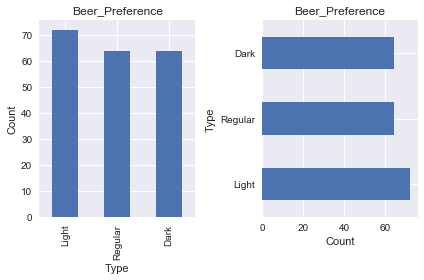

In [62]:
# Barploting the beer preference table.
fig, ax1, ax2 = plt.figure(), plt.subplot2grid((1, 2), (0, 0)), plt.subplot2grid((1, 2), (0, 1))

bTable.plot(kind='bar', ax=ax1, title='Beer_Preference')
ax1.set_xlabel('Type')
ax1.set_ylabel('Count')

bTable.plot(kind='barh', title='Beer_Preference', ax=ax2)
ax2.set_ylabel('Type')
ax2.set_xlabel('Count')
plt.tight_layout()
plt.show()

In [63]:
# Creating a pivot table from the beerPref DF.
tab1 = beerPref.groupby('gender')['Beer_Preference'].value_counts().unstack()
tab1

Beer_Preference,Dark,Light,Regular
gender,,,
Female,56,51,39
Male,8,21,25


In [64]:
# Calculations based on tab1.
print("{n} women prefer dark beer.".format(n=tab1.ix[0, 0]))
print("{n}% students prefer light beer.".format(n=(sum(tab1.Light)/sum(tab1.sum()))*100))
print("{n}% female students prefer light beer. \n{x}% male students prefer light beer.".format(n=round((tab1.ix[0, 1]/sum(tab1.ix[0]))*100, 2), x=round(((tab1.ix[1, 1]/sum(tab1.ix[1]))*100), 2)))
print("{n}% of students that prefer dark beer, are male.".format(n=round((tab1.ix[1, 0]/sum(tab1.Dark))*100, 2)))

56 women prefer dark beer.
36.0% students prefer light beer.
34.93% female students prefer light beer. 
38.89% male students prefer light beer.
12.5% of students that prefer dark beer, are male.


Beer_Preference  Dark  Light  Regular
gender                               
Female           28.0  30.36    28.09
Male              4.0  12.50    18.00


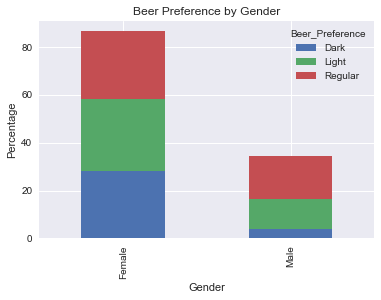

In [61]:
# Creating a percentage pivot table from tab1 
tab2 = tab1.copy()
tab2['Dark'] = round((tab2['Dark']/sum(tab2.sum()))*100, 2)
tab2['Light'] = round((tab2['Light']/sum(tab2.sum()))*100, 2)
tab2['Regular'] = round((tab2['Regular']/sum(tab2.sum()))*100, 2)
tab2

# Demonstrating table via a stacked bar plot.
fig, ax = plt.figure(), plt.subplot2grid((1, 1), (0, 0))
tab2.plot(kind='bar', stacked=True, ax=ax, title='Beer Preference by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
plt.show()

In [65]:
# Practicing data analysis on the famous cars DF.
cars = pd.read_csv(filepath_or_buffer=r'C:\Users\Nathaniel\Downloads\cars.csv')
cars.head()
print('There are {n} cars with the values of:\n'.format(n=str(len(cars))) + str(list(cars)))

There are 261 cars with the values of:
['num', 'mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'timeto60', 'year', 'brand']


C:\Users\Nathaniel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


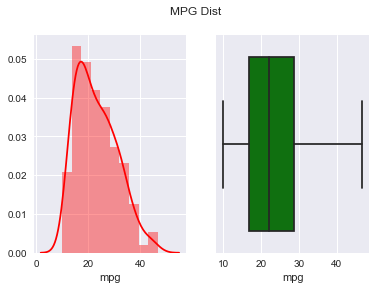

In [70]:
# Showing MPG distribution(dist) via histogram(with KDE) & box plot
fig, ax1, ax2 = plt.figure(), plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1), plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)
fig.suptitle('MPG Dist')
sns.distplot(cars['mpg'], color='red', ax=ax1)
sns.boxplot(cars['mpg'], ax=ax2, color='green')
plt.show()

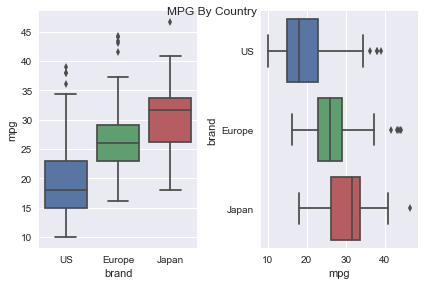

In [73]:
# Box plots of MPG dist by brand(Country)
fig, ax1, ax2 = plt.figure(), plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1), plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)
fig.suptitle('MPG By Country')
sns.boxplot(data=cars, x="brand", y="mpg", ax=ax1).set_xticklabels(['US', 'Europe', 'Japan'])
sns.boxplot(data=cars, y="brand", x="mpg", ax=ax2, orient="h").set_yticklabels(['US', 'Europe', 'Japan'])
plt.tight_layout()
plt.show()

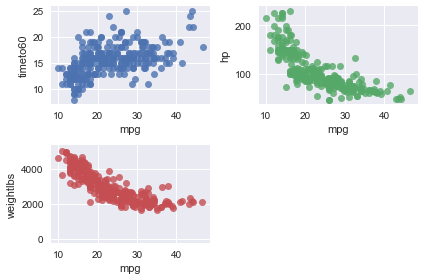

In [75]:
# Using scatter plots to show MPG corelation to Acceleration(timeto60), Horsepower(hp) and Weight(weightlbs)
fig, ax1, ax2, ax3 = plt.figure(), plt.subplot2grid((2, 2), (0, 0)), plt.subplot2grid((2, 2), (0, 1)), plt.subplot2grid((2, 2), (1, 0))
sns.regplot(x='mpg', y='timeto60', data=cars, fit_reg=False, ax=ax1)
sns.regplot(x='mpg', y='hp', data=cars, fit_reg=False, ax=ax2)
sns.regplot(x='mpg', y='weightlbs', data=cars, fit_reg=False, ax=ax3)
plt.tight_layout()
plt.show()

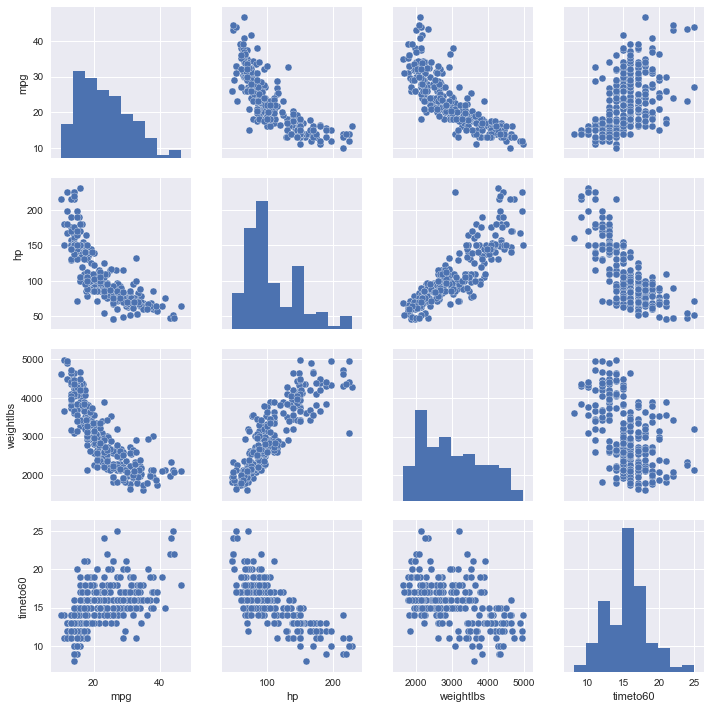

In [76]:
# Displaying all corelations. 
fig = plt.figure()
sns.pairplot(cars, vars=['mpg', 'hp', 'weightlbs', 'timeto60'])
plt.show()